In [1]:
import os
import pandas as pd
import numpy as np
from scipy.ndimage import maximum_filter
from tqdm import tqdm
from scipy.optimize import curve_fit
from Utilities import *

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", font_scale=1.2)

In [2]:
dir = "../Data/experiments_all/"
dict_data = read_experiments(dir)

100%|███████████████████████████████████████████| 25/25 [00:22<00:00,  1.09it/s]


In [3]:
dict_data['REP9']['WT'][0]

,0,25,50,75,100,125,150,200,500,750,1250,2500
0,-41.748793,-2.396218,-12.395689,0.227104,-40.975510,9.757237,34.277525,47.043641,39.103387,8.076277,64.058514,27.177879
10,-30.903269,214.463620,1063.364100,2639.395897,3155.406608,3183.896789,3260.268547,3614.605484,3663.131702,3583.826470,3027.307793,2161.972510
25,32.368987,242.395282,1459.159167,3680.108717,5117.773715,6776.170193,6952.875449,7724.788205,7020.096710,6779.041914,5472.439101,3205.735114
50,-39.339185,291.325200,1571.175090,4167.982668,5849.031318,5749.380089,8072.745198,9921.218589,8994.994142,8220.522614,5838.158926,3535.985029
75,-1.339877,304.615626,1651.218462,4396.871595,6705.762996,7524.631680,7500.794330,10415.480250,9734.821773,8108.809325,6089.261114,3414.041094
100,-68.339783,324.854415,1653.286303,4014.323144,6268.261715,7428.535962,8475.062467,10963.721140,10056.060242,8706.300858,5925.495217,3704.636769
150,11.235571,357.123787,1490.078941,4202.457134,6415.444792,7749.330909,8946.980958,10408.443872,10901.566905,8300.153522,6039.397530,3145.826817
250,0.637031,289.261939,1568.012399,4008.260143,5995.944801,7239.194038,8085.075959,9811.893045,8088.902340,6394.427660,5177.712678,2473.586046


In [5]:
def reshape(a):
    a = np.array(a, dtype=float)
    a[a<0]=0
    return np.log(a+1).reshape(-1,1)

In [28]:
feature = pd.DataFrame(columns=['genotype', 'experiment', 'var1', 'var2'])

for exp in tqdm(dict_data.keys()):
    variants = dict_data[exp]
    
    WT_av = variants['WT'][3]
    max_wt = np.around(WT_av.max().max(), decimals=2) # maximum value of WT to be used for rescaling
    
    for var in variants.keys():
        e1, e2, e3, _ = variants[var]
        e1, e2, e3 = reshape(e1/max_wt), reshape(e2/max_wt), reshape(e3/max_wt)
        exp = np.concatenate([e1, e2, e3], axis=1)

        median = np.median(exp, axis=1)
        max = median = np.max(exp, axis=1)
        min = median = np.min(exp, axis=1)
        range = np.ptp(exp, axis=1)
        variation1 = range / (median + 1)
        variation2 = (max - median) / (median - min + 1)

        feature.loc[len(feature)] = [var, exp, variation1.mean(), variation2.mean()]
        

100%|███████████████████████████████████████████| 25/25 [00:00<00:00, 56.76it/s]


In [30]:
feature

,genotype,experiment,var1,var2
0,WT,"[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, ...",0.019167,0.027440
1,A403V-A403V,"[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.00069806...",0.017029,0.018583
2,A403V-R408W,"[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, ...",0.009336,0.009542
3,I65T-R408W,"[[0.0, 0.0, 0.0], [0.0, 0.012545556150356935, ...",0.016829,0.017226
4,R158Q-R261Q,"[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, ...",0.008462,0.008822
...,...,...,...,...
155,R158Q-Y414C,"[[0.0003964830762713538, 0.0, 0.0], [0.0006471...",0.005360,0.005523
156,P211T-R408Q,"[[0.0, 0.0003748128436627846, 0.0], [0.0, 0.00...",0.016971,0.018463
157,P225T-P281L,"[[0.0, 0.0, 0.0], [0.0015559712526828726, 0.00...",0.003562,0.003577
158,P281L-A300S,"[[0.0011314123123982783, 0.0, 0.00142335789233...",0.007168,0.007361


In [86]:
df_clusters = pd.read_csv("extracted_features_v2.csv", index_col=0)
df_clusters.index = df_clusters.index+"_"+df_clusters.experiment

In [87]:
# df_clusters = unique_idx(df_clusters)
df_clusters = df_clusters.loc[[idx for idx in df_clusters.index if "WT" not in idx]]
# 
# df_clusters.head()

In [88]:
common = list(set(df_clusters.index.tolist())&set(df.index.tolist()))
print(len(common))

135


In [89]:
df, df_clusters = df.loc[common], df_clusters.loc[common]

In [90]:
df["rmse"] = np.sqrt(df_clusters["mse"]).tolist()

In [117]:
rmse_cutoff = .3
avg_range_cutoff = .04

In [118]:
outliers = [idx for idx in df.index if df.loc[idx, "rmse"]>rmse_cutoff or df.loc[idx, "avg_range"]>avg_range_cutoff]

In [119]:
from adjustText import adjust_text

500

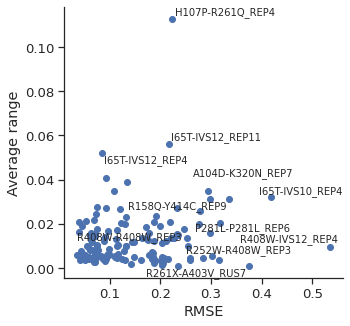

In [120]:
plt.figure(figsize=(5,5))
ax=plt.subplot(1,1,1)
ax.scatter(df["rmse"], df["avg_range"]), ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel("RMSE"), ax.set_ylabel("Average range")


texts=[]
for outlier in outliers:
    texts.append(ax.text(df.loc[outlier, "rmse"], df.loc[outlier, "avg_range"], outlier, fontsize=10))
adjust_text(texts)

In [116]:
df.to_csv("range_by_rmse.csv")